### 統計學習與深度學習 Homework 2
### 財金四 翁如萱 b07703093
---

### 第一題 [Data Preprocessing]
本題目的在於進行資料前處理，而需要完成的事項如下:
- 將標籤 '>50K' 與 '<=50K' 轉換為 1, 0
- 移除含有缺值的觀測值
- 將所有數值欄位進行標準化, 另外測試資料特徵是需要使用到訓練資料來進行標準化的
- 類別欄位使用 1-of-k encoding, 且僅保留在 train 當中出現不小於 10 次的特徵

```使用套件```

In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler
from warnings import filterwarnings 

filterwarnings('ignore')

 ```匯入資料```

In [2]:
# import adult_m50k.pickle
dsfile = 'adult_m50k.pickle'
with open(dsfile, 'rb') as fh1:
    adult50kp = pickle.load(fh1)

In [3]:
# import dataset from the url which is given in the description
# remove the first row in adult.test
train = pd.read_csv('adult/adult.data', header = None, skipinitialspace = True)
test = pd.read_csv('adult/adult.test', header = None, skipinitialspace = True)

# add the column to identify whether it belongs to train data or not.
train['train'] = 1
test['train'] = 0

# concat train and test data vertically
all_data = pd.concat([train, test])

In [4]:
# print information about dataframe
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       48842 non-null  int64 
 1   1       48842 non-null  object
 2   2       48842 non-null  int64 
 3   3       48842 non-null  object
 4   4       48842 non-null  int64 
 5   5       48842 non-null  object
 6   6       48842 non-null  object
 7   7       48842 non-null  object
 8   8       48842 non-null  object
 9   9       48842 non-null  object
 10  10      48842 non-null  int64 
 11  11      48842 non-null  int64 
 12  12      48842 non-null  int64 
 13  13      48842 non-null  object
 14  14      48842 non-null  object
 15  train   48842 non-null  int64 
dtypes: int64(7), object(9)
memory usage: 6.3+ MB


In [5]:
# rename columns name
all_data.columns = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 
                    'marital-status', 'occupation', 'relationship', 'race', 'gender',
                    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income', 'train']

```移除所有含有缺值的資料```

In [6]:
# remove rows with '?'
all_data = all_data[(all_data != '?').all(axis = 1)]

```將 '>50K'與'<=50k'轉換為 1, 0```

In [7]:
# transform '>50k' to 1 and '<=50k' to 0
all_data['income'] = all_data['income'].apply(lambda x : 0 if x.find('<=') != -1 else 1)

```進行 1-of-K encoding```

In [8]:
# split columns into categorical columns, numerical columns, and other columns (train, income)
all_col = all_data.columns
cat_col = ['relationship', 'race', 'gender', 'occupation', 'education',
           'native-country', 'workclass', 'marital-status']
num_col = ['capital-loss', 'hours-per-week', 'capital-gain', 'educational-num', 'age', 'fnlwgt']
other_col = ['income', 'train']

# rearrange dataframe
all_data = all_data[num_col + other_col + cat_col]
# implement 1-of-k encoding
all_data = pd.get_dummies(data = all_data, columns = cat_col, prefix = cat_col, prefix_sep = '_')

In [9]:
# all of the 1-of-k columns are placed behind the 'train' column
# get the index of 'train' column
train_idx = all_data.columns.get_loc('train')

# we only consider the features whose size are not less than 10 in train data
train = all_data.loc[(all_data['train'] == 1)]

# check for the columns whose sum (size) are less than 10
# so as not to remove the num_col
print(all_data.columns[train.sum() < 10])

Index(['occupation_Armed-Forces', 'native-country_Holand-Netherlands'], dtype='object')


In [10]:
# leave the qualified columns
all_data = all_data[all_data.columns[train.sum() >= 10]]

```數值欄位標準化```

In [11]:
# select numerical columns from train data
num_train = train.iloc[:, :train_idx - 1]

# compute the mean and std from num_train
scaler = StandardScaler()
scaler.fit(num_train)

# standardize 
all_data.iloc[:, :train_idx - 1] = scaler.transform(all_data.iloc[:, :train_idx - 1]) 

```建立字典```

In [12]:
# train and test data
train = all_data.loc[all_data['train'] == 1]
test = all_data.loc[all_data['train'] == 0]

# x_train, y_train
x_train = train.drop(['income', 'train'], axis = 1).to_numpy()
y_train = train['income'].to_numpy()

# x_test, y_test
x_test = test.drop(['income', 'train'], axis = 1).to_numpy()
y_test = test['income'].to_numpy()

# column_name
all_col = list(all_data.columns)
del all_col[train_idx - 1 : train_idx + 1] # remove train and income
columnname = all_col

# num_col 
num_col = num_col

In [13]:
# create dictinary named adult50k
adult50k = {'x_train':x_train, 'y_train':y_train, 
            'x_test':x_test, 'y_test': y_test,
            'columnname': columnname, 'num_col':num_col}

```比較 adult50kp 與 adult50k```

In [14]:
elems = ['x_train', 'x_test', 'y_train', 'y_test']

for aelem in elems:
    cnomatch = np.sum(adult50kp[aelem] != adult50k[aelem])
    if cnomatch == 0:
        print(aelem, "match!")
    else:
        print(aelem, "%d elements no match!" % cnomatch)
print('\n')

x_train match!
x_test match!
y_train match!
y_test match!




```處理步驟```
- 匯入資料

  * 先至題目所給定的網址下載資料集, 接著移除 adult.test 的第一列不重要資訊, 以方便處理
  * 匯入資料以後, 新增欄位 'train' 以方便後面辨識是屬於 train data 還是 test data
  * 將 train 和 test 合併以後, 根據網站上提供的資料說明, 重新命名欄位名稱
 
 
- 移除所有含有缺值的資料

  * 根據 adult.names 得知, 缺漏值將紀錄 ?, 故移除所有含有 ? 的觀測值


- 將標籤欄位轉為 0, 1

  * 觀察資料以後發現標籤的值不是只有 '> 50K' 與 '<= 50K' 兩個選項, 因此以含有 '>' 或是 '<=' 符號作為處理準則
  
  
- 進行 1-of-k-encoding

  * 將所有類別欄位進行 1-of-k-encoding
  * 出現不到 10 次的意思代表著該欄位之數值總和 < 10 (因為類別欄位為0, 1 變數)。根據這項性質取出 train data 當中總和小於 10 的欄位, 確認這些欄位都是類別欄位
  * 確認完畢以後, 選取其他大於等於 10 的欄位
  
  
- 數值欄位標準化

  * 由於是以訓練資料作為標準化的基準, 所以先取出 train 的數值欄位資料, 接著透過 fit 計算其平均值與變異數
  * 將結果套用於整份資料的數值欄位。
  
  
- 建立字典

- 確認結果之正確性

--- 

### 第二題 [ROC and AUC]
利用題目所提供的程式碼得到 ypredprob 以後, 利用其與 adult50kp['y_test'] 繪製 ROC Curve。最後計算此 ROC Curve 的 AUC

```範例程式碼```

In [15]:
import pickle
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# load dataset
dsfile = 'adult_m50k.pickle'
with open(dsfile, 'rb') as fh1:
    adult50kp = pickle.load(fh1)
    
#train prediction model    
c = 0.3
lr2 = LogisticRegression(solver = 'lbfgs', C= c, max_iter = 1000)
lr2.fit(adult50kp['x_train'], adult50kp['y_train'])
#make prediction
ypred = lr2.predict(adult50kp['x_test'])
ypredprob = lr2.predict_proba(adult50kp['x_test'])
#compute accuracy
ncorrect = np.sum(adult50kp['y_test'] == ypred)
accuracy_sk = ncorrect / adult50kp['y_test'].shape[0]
print("Accuracy = %f" % accuracy_sk)   

Accuracy = 0.848406


```繪製 ROC```

In [16]:
# get the value of FPR and TPR under the given value of threshold
def get_fpr_tpr(y_actual, y_pred, threshold):
    # calculate tp, tn, fp, fn
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    
    for i in range(len(y_pred)):
        if(y_pred[i] >= threshold):
            if(y_actual[i] == 1):
                tp += 1
            else:
                fp += 1
        else:
            if(y_actual[i] == 0):
                tn += 1
            else:
                fn += 1
    
    # calculate fpr and tpr
    fpr = fp / (tn + fp)
    tpr = tp / (tp + fn)
    
    return fpr, tpr

In [17]:
# compare ypred and ypredprob
print(ypred)
print(ypredprob) # col1

[0. 0. 0. ... 1. 0. 1.]
[[0.99710828 0.00289172]
 [0.87750542 0.12249458]
 [0.61859624 0.38140376]
 ...
 [0.30267414 0.69732586]
 [0.71883564 0.28116436]
 [0.20393821 0.79606179]]


In [18]:
# calculate FPR, TPR under different threshold
threshold_list = np.arange(0, 1.025, 0.025) # [0, 0.025, ..., 1]
fpr_list = []
tpr_list = []

y_actual = adult50kp['y_test']
y_pred = ypredprob[:, 1]
for threshold in threshold_list:
    fpr, tpr = get_fpr_tpr(y_actual, y_pred, threshold)
    fpr_list.append(fpr)
    tpr_list.append(tpr)

```繪製 ROC 曲線```

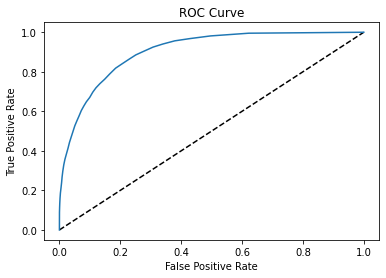

In [19]:
plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr_list,tpr_list)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

```計算 AUC```

In [20]:
auc = 0

for idx in range(1, len(tpr_list)):
    auc += 0.5 * (tpr_list[idx] + tpr_list[idx - 1]) * (fpr_list[idx - 1] - fpr_list[idx])
    
print(f"AUC = {auc}")    
print('\n')

AUC = 0.9027873762847355




```處理步驟```

- 設計一個可以計算在不同門檻之下的 FPR, TPR 的函式

    * 先計算 fn, tn, fp, tp, 接著求得 fpr, tpr 以後回傳


- 確定 y_pred, y_actual
    
    * 觀察 ypredprob 可發現每筆資料都有兩個機率值, 且此二機率值和為 1
    * 將 adult50kp['y_test'] 與 ypredprob 進行比較, 可發現取用 ypredprob 的第 2 欄 (col1) 較能吻合。


- 在不同門檻之下計算 fpr, tpr
    * 門檻設定為 1 ~ 0 之間, 而間距則是 0.025
    * 紀錄每個門檻之下的 fpr, tpr
    
    
- 繪製 ROC Curve
    * 利用 fpr_list, tpr_list 畫圖


- 計算 AUC
    * 將 auc 切割許多梯形, 並進行面積加總

---
### 第三題 [Logistic Regression with L2 Regularization]

### Q3.1
本題的目的在於推導出 $E(w) = \frac{1}{2} w^T \Lambda w - \sum_{i=1}^n [ t_i \ln y_i  + (1 - t_i) \ln (1 - y_i)]$ 的梯度 (gradient) 以及海森矩陣 (hessian matrix)

- Gradient:

$\nabla E(w) = \Lambda w + \sum_{i=1}^n(y_i - t_i)x_i = \Lambda w + X(y-t)$

- Hessian Matrix
$H = \nabla \nabla E(w) = \sum_{i=1}^ny_i(1-y_i)x_ix_i^T+ \Lambda = X^TRX + \Lambda$, 其中 $R$ 是一個對角矩陣 (diagonal matrix), 而 $R_{nn} = y_i(1-y_i)$

事實上新的 $E(w)$ 原則上和投影片的 $E(w)$相同, 兩者的差異只有 regularized term 以及 notation, 故僅須修正 regularized term 的偏微分計算。


### Q3.2
本題主要目的為建立一個 logistic 模型, 並且在不同的 case 之下訓練模型, 最後展示參數權重以及準確度 (accuracy)

```匯入資料```

In [21]:
# import adult_m50k.pickle
dsfile = 'adult_m50k.pickle'
with open(dsfile, 'rb') as fh1:
    adult50kp = pickle.load(fh1)

```建立 lambda vector```

In [22]:
# create lambda_vec
def create_lambda_vec(num_w, bin_w, add_intercept = True):
    """
    Input: 
    num_w: the regularization coefficient for numerical features
    bin_w: the regularization coefficient for binary features
    add_intercept: whether to add intercept in the model
    
    Output:
    lambda_vec: The output format is [lam_1, lam_2, ..., lam_D]. lam_k is the regularization coefficient
    for w_k, and lam_D only exists when add_intercept = True; moreover, it will be set to 0.
    """
    # get the index of numerical columns and binary columns respectively
    all_col_name = adult50kp['columnname']
    num_col_name = adult50kp['num_col']
    num_col_idx = np.where(np.isin(all_col_name, num_col_name))
    bin_col_idx = np.where(~np.isin(all_col_name, num_col_name))
    
    # create lambda_vec
    features_cnt = len(all_col_name)
    lambda_vec = np.full([1, features_cnt + add_intercept], 0.)[0]
    for idx in range(features_cnt):
        lambda_vec[idx] = num_w if np.isin(idx, num_col_idx) else bin_w
    
    return lambda_vec

```建立模型```

In [23]:
class mylogistic_l2():
    def __init__(self, reg_vec, max_iter = 100, tol = 1e-5, add_intercept = True):
        """
        reg_vec: the regularization coefficient vector
        max_iter: maximum number of iteration to run for the Newton method
        tol: tolerance for the objective function
        add_intercept: whether to add intercept (a column of ones) at last column of the feature matrix
        """
        self.reg_vec = reg_vec
        self.max_iter = max_iter
        self.tol = tol
        self.add_intercept = add_intercept

    def fit(self, x, y, verbal = False):        
        
        # calculate the error function
        def error_function(w):
            y = 1 / (1 + np.exp(-x @ w))
            error = 0.5 * w.T @ Lambda_matrix @ w - np.sum(np.log(y) * t + np.log(1 - y) * (1 - t))
            return error[0][0]
            
        # reshape y to column vector, and then rename it
        t = y.copy().reshape(-1, 1)
        
        # add intercept to x if add_intercept = True 
        if(self.add_intercept):
            intercept = np.ones((x.shape[0], 1))
            x = np.concatenate((x, intercept), axis = 1)
       
        # whether the length of lambda_vec matches the number of columns of x
        # create the diagonal matrix 
        if(len(self.reg_vec) != x.shape[1]):
            raise ValueError('The length of lambda_vec should match the number of columns of x')
        else:
            Lambda_matrix = np.eye(len(self.reg_vec)) # the diagonal matrix that have lambda_k at Lambda_{kk} 
            for idx in range(len(self.reg_vec)):
                Lambda_matrix[idx][idx] = self.reg_vec[idx]
        
        # initialize vector of w by using the closed-form solution of ridge regression
        b = self.reg_vec.mean() # b is the mean of lambda (including the regularization coef. for intercept)
        I = np.eye(len(self.reg_vec))
        w = np.linalg.inv(x.T @ x + b * I) @ x.T @ t
        
        # start to optimize by Newton-Raphson optimization
        error = []
        w_list = []
        
        last_error = error_function(w)
        error.append(last_error)
        w_list.append(w)
        
        for i in range(self.max_iter):
            
            # calculate gradient and hessian matrix
            y =  1 / (1 + np.exp(-x @ w))
            H = Lambda_matrix.copy()
            for n in range(len(x)):
                H += y[n] * (1 - y[n]) * (x[n].reshape(-1,1) @ x[n].reshape(1,-1))
            
            grad = Lambda_matrix @ w + x.T @ (y - t).reshape(-1,1) 
            
            # calculate new w and its error
            w = w - np.linalg.inv(H) @ grad # new w
            w_list.append(w)
            
            cur_error = error_function(w) # current error
            error.append(cur_error)
            
            # calculate the improvement on the error function
            if (abs(cur_error - last_error) < self.tol):
                break
                
            # stor the last error
            last_error = cur_error
            
        # final result of w, error
        min_index = error.index(min(error))
        self.w = w_list[min_index]
        self.error = min(error) # choose the smallest one to be error
        
        # if verbal = True, print w
        if(verbal):
            print(w)
        
    def predict(self, x):
        """doing prediction"""
        
        # add intercept if add_intercept = True
        if(self.add_intercept):
            intercept = np.ones((x.shape[0], 1))
            x = np.concatenate((x, intercept), axis = 1)
            
        # obtain the predicted prob of y
        y = 1 / (1 + np.exp(-x @ self.w))
        
        # transform to 0 and 1; use 0.5 as the threshold for the positive case
        t_pred = y.copy()
        t_pred[y >= 0.5] = 1
        t_pred[y < 0.5] = 0
        
        return t_pred

```計算 Accuracy```

In [24]:
def cal_accuracy(pred, actual = adult50kp['y_test']):
    """compute accuracy"""
    ncorrect = np.sum(actual == pred)
    accuracy = ncorrect / actual.shape[0]
    return accuracy

#### Case1: 

$\lambda = 1$ for all coefficients (no intercept in this case)

In [25]:
lambda_vec1 = create_lambda_vec(num_w = 1, bin_w = 1, add_intercept = False)
logic1 = mylogistic_l2(reg_vec = lambda_vec1, max_iter = 1000, tol = 1e-5, add_intercept = False)
logic1.fit(adult50kp['x_train'], adult50kp['y_train'])
ypred1 = logic1.predict(adult50kp['x_test']).reshape(1,-1)

In [26]:
print("【Case 1】")
print(f"Weights:\n{logic1.w.reshape(1,-1)}")
print(f"Accuracy: {cal_accuracy(ypred1)}")
print("\n")

【Case 1】
Weights:
[[ 0.25829765  0.35286355  2.33421989  0.76093037  0.33328473  0.07921358
  -0.419065   -0.20451831 -0.9629374  -1.33000522 -0.3288797   0.90975624
  -0.82700342 -0.08741964 -0.4336111  -0.70534448 -0.28227076 -1.59439588
  -0.74125351 -0.01306693  0.05205653  0.78777243 -0.99240259 -0.69494818
  -0.27531241 -0.82656047 -1.65298178  0.50035667  0.5744047   0.27914971
   0.64286175 -0.10294562 -0.05522086 -0.25465123 -0.20782379  0.59348693
   0.40713026 -0.02200255 -0.00265095 -0.56924112 -0.27740542 -0.24561796
  -0.10973204 -0.1785307  -0.18530458 -1.1801582   0.09228902 -0.14021619
   0.95308764  0.43076916 -0.52328048 -1.29561267  0.45661075 -0.92159731
  -0.08387461 -0.377851    0.40295961  0.56788744  0.5513525  -0.646118
  -0.08193625  0.06989464 -0.15796955 -0.02724891  0.01354307 -0.31896669
   0.12772484  0.4727378   0.8610213   0.12126426  0.31527274 -0.33233611
  -0.3886933  -0.38430904 -0.67919585 -0.42890424  0.417121    0.10920407
   0.11723865 -0.14731

#### Case2: 

$\lambda = 1$ for all but the intercept

In [27]:
lambda_vec2 = create_lambda_vec(num_w = 1, bin_w = 1, add_intercept = True)
logic2 = mylogistic_l2(reg_vec = lambda_vec2, max_iter = 1000, tol = 1e-5, add_intercept = True)
logic2.fit(adult50kp['x_train'], adult50kp['y_train'])
ypred2 = logic2.predict(adult50kp['x_test']).reshape(1,-1)

In [28]:
print("【Case 2】")
print(f"Weights:\n{logic2.w.reshape(1,-1)}")
print(f"Accuracy: {cal_accuracy(ypred2)}")
print("\n")

【Case 2】
Weights:
[[ 0.25833063  0.35307341  2.33348255  0.7378757   0.33385106  0.07926886
  -0.04219572  0.1998764  -0.58360968 -0.93671312  0.07548468  1.28715744
  -0.37140327  0.39422898  0.04305748 -0.26147348  0.19559029 -0.42695771
   0.42695771  0.16424528  0.22840772  0.96472553 -0.81743779 -0.52074423
  -0.09910239 -0.64944042 -1.55235098  0.6786798   0.75066429  0.45541098
   0.81857112  0.07308911  0.0728464  -0.11752644 -0.06282948  0.67242506
   0.5040869   0.08799091  0.11435013 -0.38483984 -0.10196309 -0.05145374
   0.10741777 -0.01997934  0.01717544 -1.16567808  0.30082277  0.02715464
   1.00831207  0.50210397 -0.45756662 -1.24002555  0.52780939 -0.86832688
  -0.02771494 -0.31412701  0.47343435  0.62981111  0.62405658 -0.5867506
  -0.0296708   0.12414401 -0.14376238  0.02434194  0.0621604  -0.24843986
   0.19459429  0.52620501  0.93165615  0.18707696  0.37950109 -0.28749402
  -0.31137357 -0.33290534 -0.65117786 -0.38160106  0.48879121  0.17662205
   0.17410342 -0.0734

#### Case3: 

$\lambda = 1$ for all numerical-values features, $\lambda = 0.5$ for binary-valued features, no regularization for intercept term

In [29]:
lambda_vec3 = create_lambda_vec(num_w = 1, bin_w = 0.5, add_intercept = True)
logic3 = mylogistic_l2(reg_vec = lambda_vec3, max_iter = 1000, tol = 1e-5, add_intercept = True)
logic3.fit(adult50kp['x_train'], adult50kp['y_train'])
ypred3 = logic3.predict(adult50kp['x_test']).reshape(1,-1)

In [30]:
print("【Case 3】")
print(f"Weights:\n{logic3.w.reshape(1,-1)}")
print(f"Accuracy: {cal_accuracy(ypred3)}")
print("\n")

【Case 3】
Weights:
[[ 0.25851661  0.3533387   2.33562764  0.7825921   0.33439916  0.07940036
  -0.08347988  0.23309134 -0.59278098 -0.9224849   0.11139573  1.25425869
  -0.38299462  0.41291781  0.04136013 -0.26411462  0.19283128 -0.42890321
   0.42890321  0.23635122  0.30021361  1.03810521 -0.75216086 -0.4534137
  -0.02691157 -0.5825269  -2.00075382  0.75127891  0.82696617  0.52830705
   0.89488994  0.14510375  0.18253094 -0.02583999  0.00991404  0.89862004
   0.68517002  0.23294385  0.24519931 -0.38363083 -0.08029608 -0.06493444
   0.0453608   0.03743376 -0.01295908 -2.09374319  0.25763304  0.06659781
   1.18748312  0.55059265 -0.47576613 -1.45842154  0.5822242  -1.0627833
  -0.00957211 -0.31704572  0.52485137  0.73044517  0.67457228 -0.63624179
  -0.00967268  0.17339113 -0.2364757   0.0375474   0.10120874 -0.24679341
   0.23800627  0.64228457  1.00567032  0.23258941  0.42267607 -0.35336167
  -0.29178766 -0.38125401 -0.96291964 -0.45007954  0.512985    0.22019382
   0.22640627 -0.04989

```說明```

Case 1: 這個模型不包含截距項, 另外所有變數之正規項係數皆為 1

Case 2: 這個模型包含截距項, 另外除了截距項之正規項係數為 0 以外, 其餘皆為 1

Case 3: 這個模型包含截距項, 另外截距項之正規項係數為 0, 連續變數為 1, 類別變數則是 0.5


```結果討論```
- 三者之準確度非常接近, 都落於 0.847 左右
- 準確度排序: Case 1 > Case 2 > Case 3

### Q3.3
將 training data 切割為 subtraining (90%) 還有 tuning (10%), 並依據題目給定的步驟, 尋找最佳的 hyperparameters。並且計算使用最佳超參數以後的模型準確率。

```分割 training data ```

In [31]:
# random permutation dataset
x = adult50kp['x_train']
y = adult50kp['y_train']
indices = np.random.permutation(x_train.shape[0])

# split training data into subtraining and tuning
split_len = int(len(x) * 0.9)
sub_idx = indices[:split_len]
tune_idx = indices[split_len:]

# get x_subtrain, y_subtrain, x_tune, x_tune
x_subtrain, y_subtrain, x_tune, y_tune = x[sub_idx], y[sub_idx], x[tune_idx], y[tune_idx]

```進行 grid search```

In [32]:
# constraint: a1 = a2

accuracy_best = np.inf
a_best = 0

for a in np.linspace(start = 0.01, stop = 10, num = 10):
    # train model and obtain accuracy
    lambda_vec_a = create_lambda_vec(num_w = a, bin_w = a, add_intercept = True)
    logic_a = mylogistic_l2(reg_vec = lambda_vec_a, max_iter = 1000, tol = 1e-5, add_intercept = True)
    logic_a.fit(x_subtrain, y_subtrain)
    ypred_a = logic_a.predict(x_tune)
    accuracy_a = cal_accuracy(ypred_a).reshape(1,-1)
    
    if(accuracy_a < accuracy_best):
        accuracy_best = accuracy_a
        a_best = a

In [33]:
# fix a1 = a1*, search a2

accuracy_best = np.inf
a2_best = 0

for a2 in np.linspace(start = 0.01, stop = 10, num = 10):
    # train model and obtain accuracy
    lambda_vec_a2 = create_lambda_vec(num_w = a_best, bin_w = a2, add_intercept = True)
    logic_a2 = mylogistic_l2(reg_vec = lambda_vec_a2, max_iter = 1000, tol = 1e-5, add_intercept = True)
    logic_a2.fit(x_subtrain, y_subtrain)
    ypred_a2 = logic_a.predict(x_tune)
    accuracy_a2 = cal_accuracy(ypred_a2).reshape(1,-1)
    
    if(accuracy_a2 < accuracy_best):
        accuracy_best = accuracy_a2
        a2_best = a2

In [34]:
# fix a2 = a2*, search a1

accuracy_best = np.inf
a1_best = 0

for a1 in np.linspace(start = 0.01, stop = 10, num = 10):
    # train model and obtain accuracy
    lambda_vec_a1 = create_lambda_vec(num_w = a1, bin_w = a2_best, add_intercept = True)
    logic_a1 = mylogistic_l2(reg_vec = lambda_vec_a1, max_iter = 1000, tol = 1e-5, add_intercept = True)
    logic_a1.fit(x_subtrain, y_subtrain)
    ypred_a1 = logic_a.predict(x_tune).reshape(1,-1)
    accuracy_a1 = cal_accuracy(ypred_a1)
    
    if(accuracy_a1 < accuracy_best):
        accuracy_best = accuracy_a1
        a1_best = a1

In [35]:
# report selected a1, a2
print(f"a1* = {a1_best}, a2 = {a2_best}")

a1* = 0.01, a2 = 0.01


In [36]:
# train a model, and report test accuracy
lambda_vec_best = create_lambda_vec(num_w = a1_best, bin_w = a2_best, add_intercept = True)
logic_best = mylogistic_l2(reg_vec = lambda_vec_best, max_iter = 1000, tol = 1e-5, add_intercept = True)
logic_best.fit(adult50kp['x_train'], adult50kp['y_train'])
ypred_best = logic_best.predict(adult50kp['x_test']).reshape(1,-1)
accuracy_final = cal_accuracy(ypred_best)
print(f"test accuracy = {accuracy_final}")
print("\n")

test accuracy = 0.8476095617529881




```結果討論```
- 最後選出的 a1, a2 皆為 0.01
- 準確度和前面的模型也很接近。

### Q3.4
本題欲利用 sklearn 套件訓練、測試模型, 另外也需要進行調整超參數的動作。

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [38]:
grid = {"C":np.logspace(-3,3,5), "penalty":["l1","l2"]}
model = LogisticRegression()
model_tune = GridSearchCV(model, grid, cv = 10)
model_tune.fit(adult50kp['x_train'], adult50kp['y_train'])

accuracy = model_tune.score(adult50kp['x_test'], adult50kp['y_test'])
print(f"accuracy = {accuracy}")
print("\n")

accuracy = 0.847808764940239




```說明```

這邊有進行的超參數調整有正規化的強度 (C) 還有正規化的方式 (penalty)

```結果討論```
- 和前面的 case 之準確度都相當接近。